# Graduate Rotational Internship Program: The Spark Foundation

## Omkar V. More

### Task 2 : Prediction using Unsupervised Learning

### Objective: Predicting the optimum number of clusters from the given 'Iris' dataset and representing it visually.

## Importing  Libraries

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
iris_data=pd.read_csv("iris.csv")
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### About Data 

In [3]:
iris_data.shape

(150, 6)

In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Data Visualization

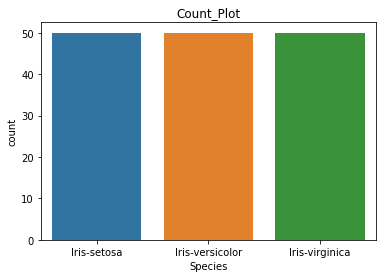

In [7]:
sns.countplot('Species',data=iris_data)
plt.title("Count_Plot")
plt.show()

Since the data set is equally balanced, we got the equal no of counts

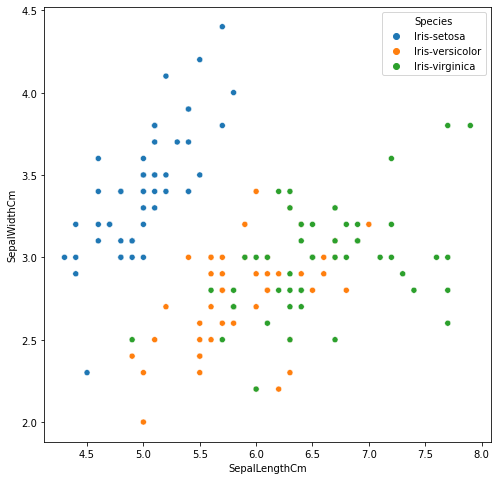

In [8]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=iris_data['SepalLengthCm'], y=iris_data['SepalWidthCm'], hue=iris_data['Species'])
plt.show()

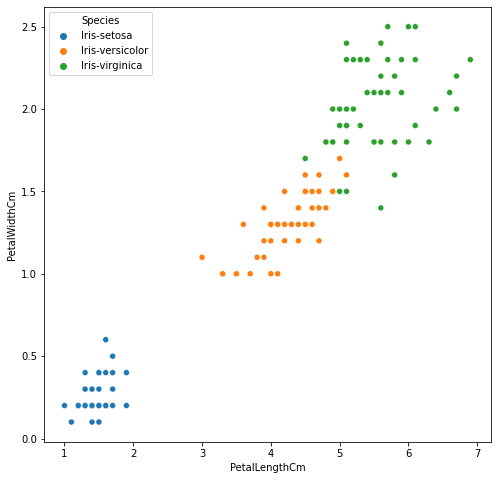

In [9]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=iris_data['PetalLengthCm'], y=iris_data['PetalWidthCm'], hue=iris_data['Species'])
plt.show()

<Figure size 432x432 with 0 Axes>

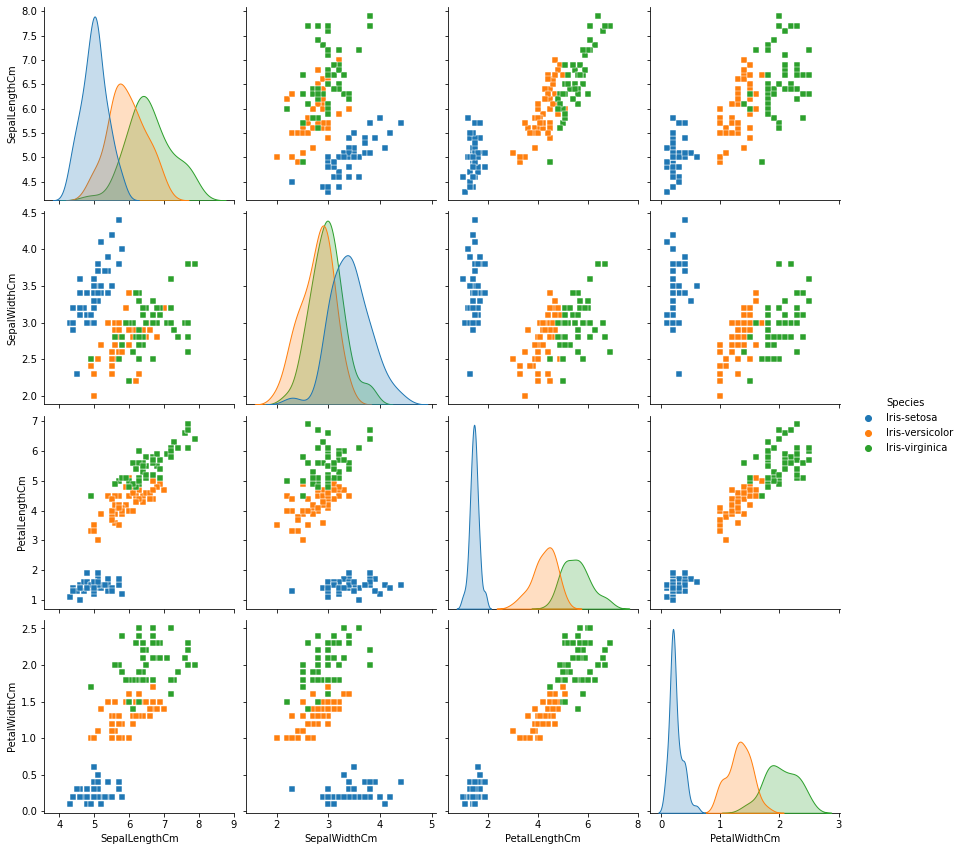

In [13]:
plt.figure(figsize=(6,6))
sns.pairplot(iris_data.drop("Id", axis=1),hue="Species",height=3,markers="s")
plt.show()

From above plot we can see that,

1. In case of sepal length & sepal width, setosa is easily seperable but versicolor & virginica have some overlap.
2. In case of petal length & petal width, all the species are quite seperable. And the useful features to distinguish flower types.

## Unsupervised Machine Learning : K Means Clustering

### Extracting the Attributes

In [15]:
x = iris_data.drop(['Species'],axis=1)
x = StandardScaler().fit_transform(x)

### Appling the K Means Clustering

###  Elbow method: For Finding Optimal Clusters

In [16]:
k_rng =range(1,10)
wcss=[]
for k in k_rng:
    km=KMeans(n_clusters = k)
    km.fit(x)
    wcss.append(km.inertia_)

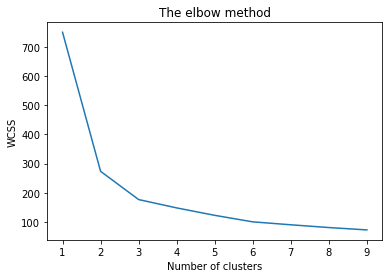

In [17]:
plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The above method is the implementation of "The Elbow Method". The elbow method shows us to pick optimum no of clusters for classification. Also, the plot clearly shows why it is called "The elbow method".

The optimum clusters is where the elbow curve happens. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. In above graph, clusters = k =3.

Now that we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset.

### Fitting the Model and Visualizing

In [28]:
kmeans = KMeans(n_clusters = 3)
pred_kmeans = kmeans.fit_predict(x)
pred_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
centroids=kmeans.cluster_centers_
centroids

array([[ 1.14317894,  1.03542672, -0.07079946,  1.04224753,  1.09269889],
       [-1.1547262 , -1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [ 0.07560189,  0.03894137, -0.73184462,  0.30676007,  0.21508647]])

In [32]:
dataset=iris_data.copy()
dataset["Species"]=dataset["Species"].map({'Iris-versicolor':0,'Iris-setosa':1,'Iris-virginica':2}).astype(int)
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


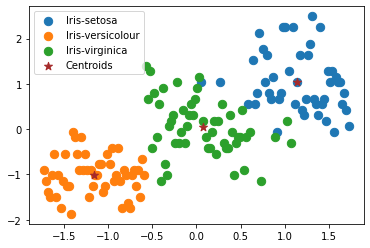

In [36]:
plt.scatter(x[pred_kmeans == 0, 0], x[pred_kmeans == 0, 1], s = 70, label = 'Iris-setosa')
plt.scatter(x[pred_kmeans == 1, 0], x[pred_kmeans == 1, 1], s = 70, label = 'Iris-versicolour')
plt.scatter(x[pred_kmeans == 2, 0], x[pred_kmeans == 2, 1], s = 70, label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 70, c = 'brown',marker='*', label = 'Centroids')

plt.legend()
plt.show()

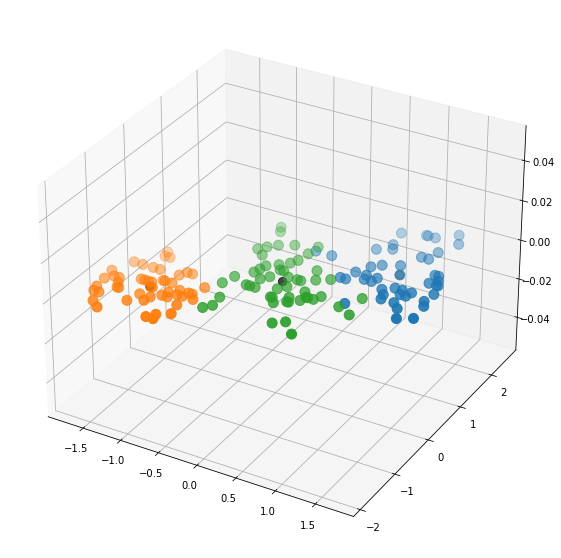

In [35]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[pred_kmeans == 0, 0], x[pred_kmeans == 0, 1], s = 100, label = 'Iris-setosa')
plt.scatter(x[pred_kmeans == 1, 0], x[pred_kmeans == 1, 1], s = 100, label = 'Iris-versicolour')
plt.scatter(x[pred_kmeans == 2, 0], x[pred_kmeans == 2, 1], s = 100, label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 70, c = 'black', label = 'Centroids')
plt.show()

#                                                       Thank You